## sambung ke api spotify

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
client_id = "612b8c73a1b44df3bd44547cfe3ae30f"
client_secret = "6055284748c44172a47f9b83cb95965b"

In [4]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
# sp = spotipy.Spotify(auth_manager)

In [5]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### menentukan artis

In [6]:
artis = ['Zach Bryan','Metro Boomin','SZA','Taylor Swift','Natanael Cano','Metro Boomin','Drake','Lil Uzi Vert','Rema']
print(artis)

['Zach Bryan', 'Metro Boomin', 'SZA', 'Taylor Swift', 'Natanael Cano', 'Metro Boomin', 'Drake', 'Lil Uzi Vert', 'Rema']


### menentukan atribut yang akan diambil

In [7]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)

    name = meta['name']
    album = meta['album']['name']
    artis = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    lenght = meta['duration_ms']
    popularity = meta['popularity']

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy =  features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loadness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album,artis, release_date,lenght,popularity,acousticness,danceability,energy,instrumentalness,liveness,loadness,speechiness,tempo,time_signature]
    return track

### tarik data dri spotify

In [8]:
import pandas as pd

In [9]:
def get_songs():
    tracks = []
    # for i in range(0, 1000, 50):
    for i in artis:
        song = sp.search(i, type='track', limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    df = pd.DataFrame(tracks, columns=['name', 'album','artis', 'release_date','lenght','popularity','acousticness','danceability','energy','instrumentalness','liveness','loadness','speechiness','tempo','time_signature'])
    
    return df

In [10]:
df = get_songs()
df

,name,album,artis,release_date,lenght,popularity,acousticness,danceability,energy,instrumentalness,liveness,loadness,speechiness,tempo,time_signature
0,Something in the Orange,Something in the Orange,Zach Bryan,2022-04-22,228013,90,0.555000,0.369,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3
1,Heading South,Heading South,Zach Bryan,2019-09-30,171692,85,0.783000,0.680,0.246,0.000000,0.1060,-14.112,0.0580,110.230,4
2,Oklahoma Smokeshow,Summertime Blues,Zach Bryan,2022-07-15,211739,82,0.095800,0.544,0.573,0.000000,0.1040,-5.694,0.0356,122.977,4
3,Sun to Me,American Heartbreak,Zach Bryan,2022-05-20,163031,83,0.593000,0.505,0.270,0.000000,0.1330,-9.165,0.0333,98.721,4
4,"Burn, Burn, Burn","Burn, Burn, Burn",Zach Bryan,2022-09-08,268856,82,0.897000,0.508,0.296,0.000050,0.1100,-10.513,0.0755,82.532,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Go Your Own Way - 2004 Remaster,Rumours,Fleetwood Mac,1977-02-04,223613,83,0.018500,0.583,0.947,0.001090,0.0679,-5.120,0.0378,135.448,4
446,DJ REMA FAME - A COLORS ENCORE,DJ REMA FAME - A COLORS ENCORE,AyUb YETE,2023-05-03,252960,29,0.061000,0.838,0.349,0.000582,0.1350,-22.712,0.0482,130.005,4
447,Immigrant Song - Remaster,Led Zeppelin III (Remaster),Led Zeppelin,1970,146250,82,0.013000,0.564,0.932,0.169000,0.3490,-10.068,0.0554,112.937,4
448,Ginger Me,Ginger Me,Rema,2020-06-18,205892,57,0.134000,0.567,0.577,0.000397,0.1450,-7.833,0.1340,200.008,5


In [11]:
df.to_excel(r'top_artis_2022.xlsx', index=False)

### ekplorasi data

In [12]:
df.sort_values(by=['popularity'], ascending=False)[['name','artis']].head(10)

,name,artis
150,Cruel Summer,Taylor Swift
52,Creepin' (with The Weeknd & 21 Savage),Metro Boomin
252,Creepin' (with The Weeknd & 21 Savage),Metro Boomin
200,PRC,Peso Pluma
153,Anti-Hero,Taylor Swift
400,Calm Down (with Selena Gomez),Rema
100,Kill Bill,SZA
50,Calling (Spider-Man: Across the Spider-Verse) ...,Metro Boomin
250,Calling (Spider-Man: Across the Spider-Verse) ...,Metro Boomin
54,"Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)",Metro Boomin


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

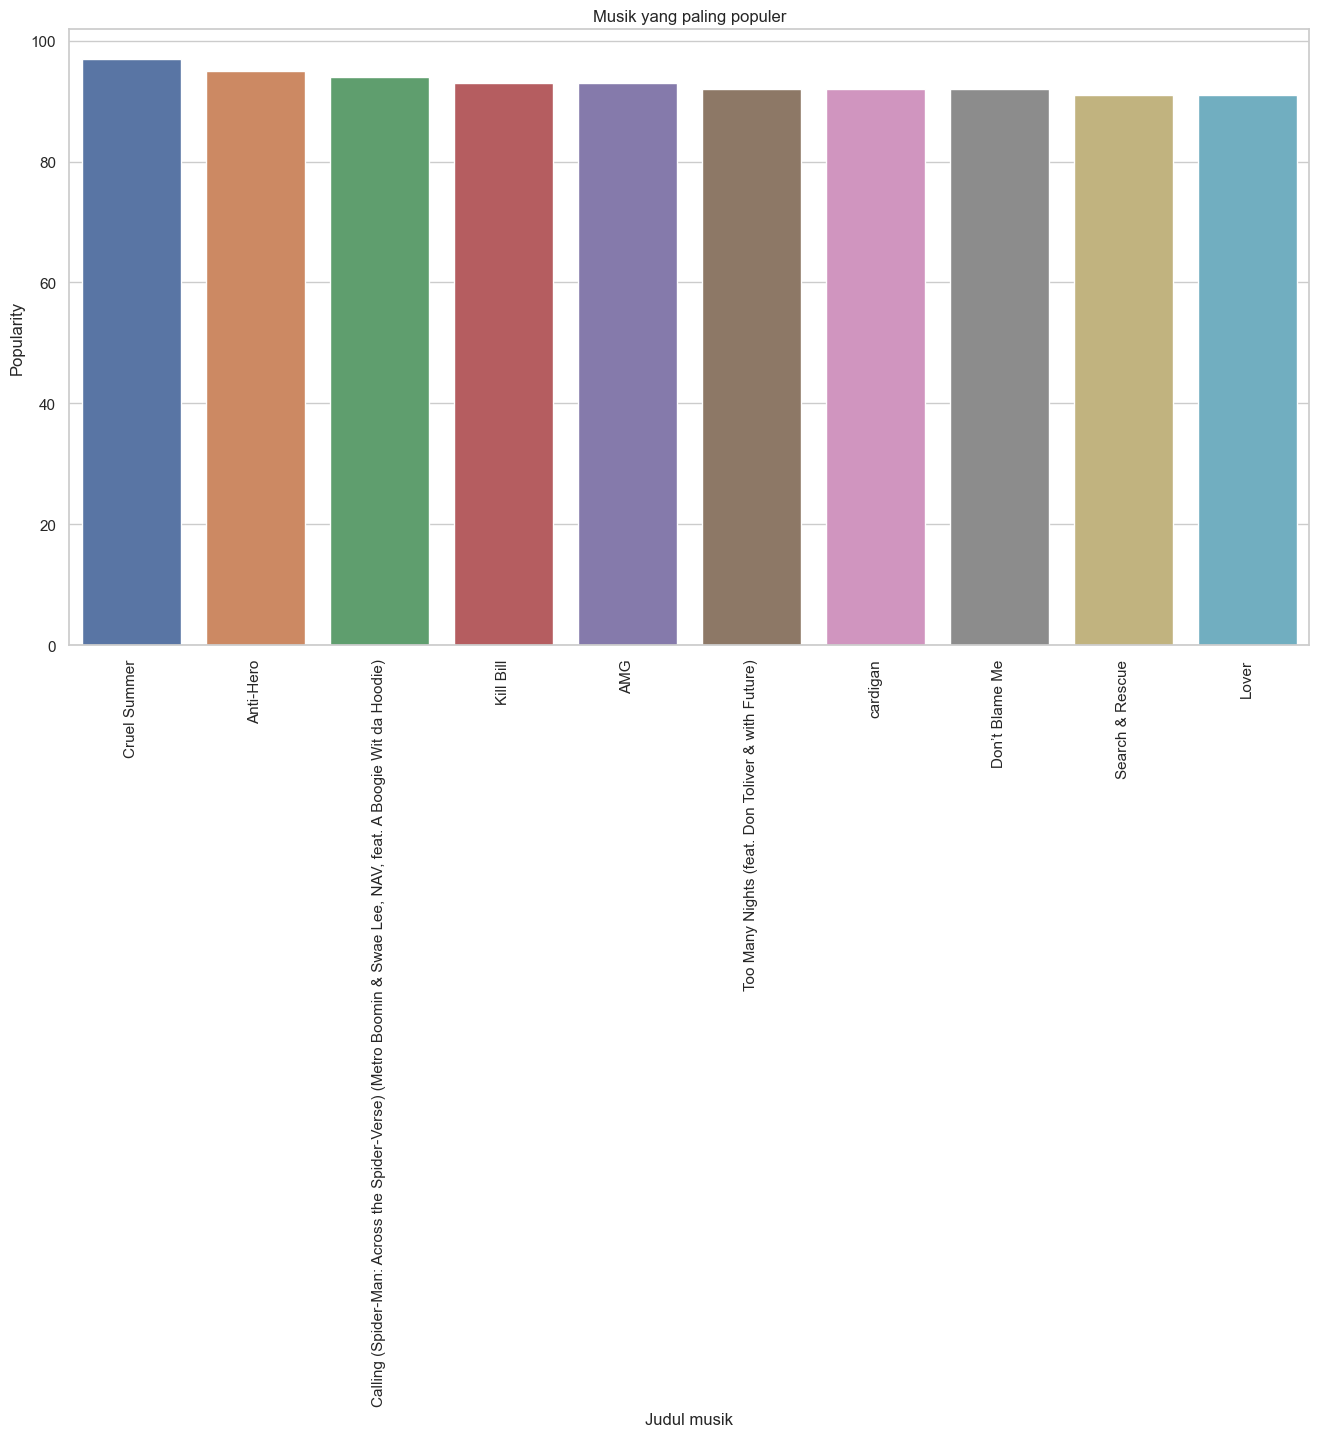

In [14]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")

x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=x.index, y=x)
ax.set_title('Musik yang paling populer')
ax.set_ylabel('Popularity')
ax.set_xlabel('Judul musik')

plt.xticks(rotation=90)
plt.show()

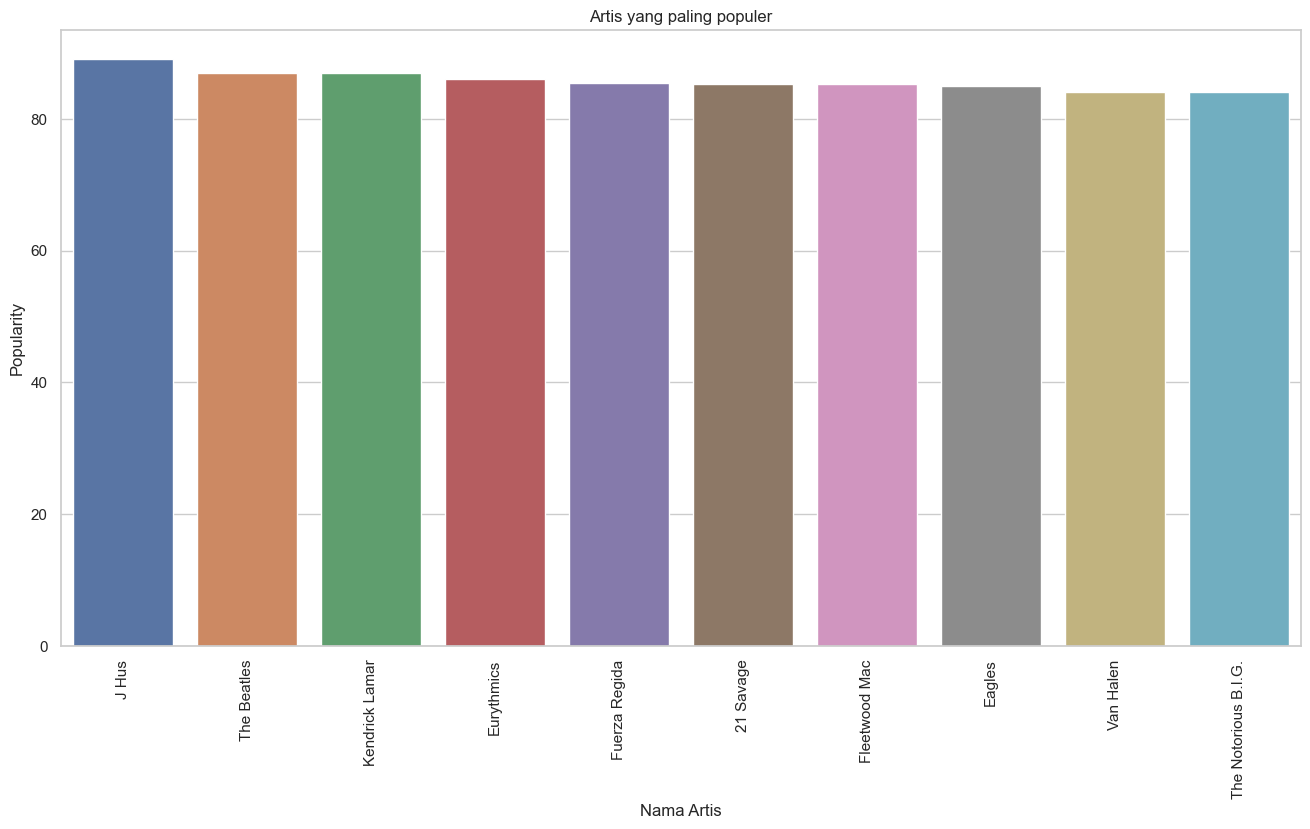

In [15]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")

x = df.groupby("artis")["popularity"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=x.index, y=x)
ax.set_title('Artis yang paling populer')
ax.set_ylabel('Popularity')
ax.set_xlabel('Nama Artis')

plt.xticks(rotation=90)
plt.show()

<Figure size 1600x800 with 0 Axes>

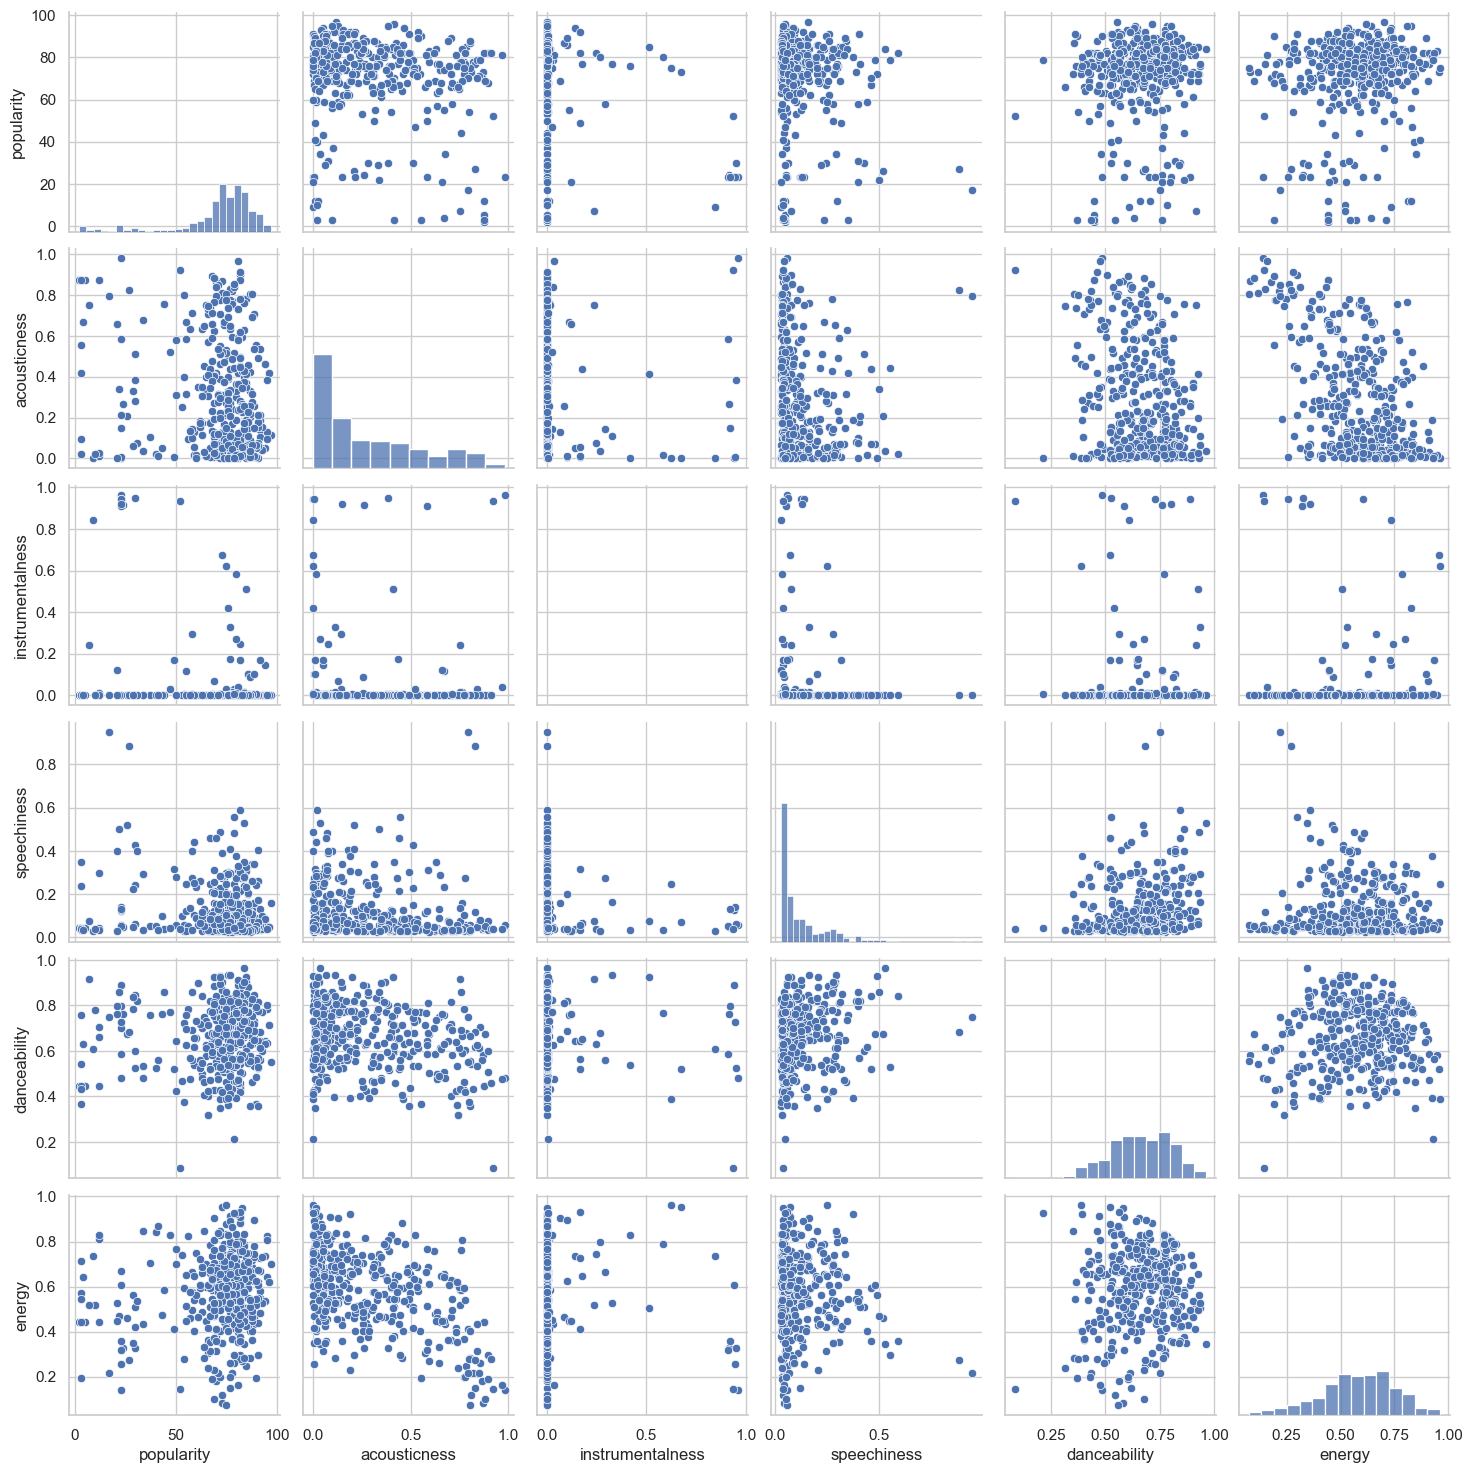

In [16]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")

cols = ["popularity","acousticness","instrumentalness","speechiness","danceability","energy"]
sns.pairplot(df[cols], height=2.5)
plt.show()

In [17]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="coolwarm")
plt.show()

ValueError: could not convert string to float: 'Something in the Orange'

<Figure size 1600x800 with 0 Axes>

In [ ]:
df

NameError: name 'df' is not defined